In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import spacy

# ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

/kaggle/input/emotion/Emotion_final.csv


The model that I will be using is the random forest model. I felt this will be well suited because there is less tuning involved and it can handel larger amount of data. I will training the data to make it determine emotions more with taking out the stop words and having it to lemminization. 

In [93]:
data = pd.read_csv('/kaggle/input/emotion/Emotion_final.csv')

In [94]:
data.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasnt sure why that was,sadness
6,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,surprise
7,i feel as confused about life as a teenager or as jaded as a year old man,fear
8,i have been with petronas for years i feel that petronas has performed well and made a huge profit,happy
9,i feel romantic too,love


In [95]:
pd.set_option("display.max_colwidth", 240)
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [97]:
data.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [98]:
data['Emotion'].value_counts()

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

In [99]:
# Show sample
print(f"{data['Text'][0]} -> {data['Emotion'][0]}")

i didnt feel humiliated -> sadness


In [100]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

In [101]:
txt = data['Text'][3]
txt

'i am ever feeling nostalgic about the fireplace i will know that it is still on the property'

In [102]:
doc = nlp(txt)

In [103]:
for token in doc:
    print(token)

i
am
ever
feeling
nostalgic
about
the
fireplace
i
will
know
that
it
is
still
on
the
property


In [104]:
for token in doc:
    print(f"Word: {token} | -> {token.lemma_}")

Word: i | -> I
Word: am | -> be
Word: ever | -> ever
Word: feeling | -> feel
Word: nostalgic | -> nostalgic
Word: about | -> about
Word: the | -> the
Word: fireplace | -> fireplace
Word: i | -> I
Word: will | -> will
Word: know | -> know
Word: that | -> that
Word: it | -> it
Word: is | -> be
Word: still | -> still
Word: on | -> on
Word: the | -> the
Word: property | -> property


In [105]:
for token in doc:
    if token.is_stop or token.is_punct:
        print(token)

i
am
ever
about
the
i
will
that
it
is
still
on
the


In [106]:
# use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [107]:
print(txt)
procces_txt = preprocess(txt)
print(procces_txt)

i am ever feeling nostalgic about the fireplace i will know that it is still on the property
feel nostalgic fireplace know property


In [109]:
data['preprocessed_text'] = data['Text'].apply(preprocess)

In [111]:
data

,Text,Emotion,preprocessed_text
0,i didnt feel humiliated,sadness,nt feel humiliate
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,feel grouchy
...,...,...,...
21454,Melissa stared at her friend in dism,fear,Melissa stare friend dism
21455,Successive state elections have seen the governing parties pummelled by a dismayed electora,fear,successive state election see govern party pummel dismayed electora
21456,Vincent was irritated but not dismay,fear,Vincent irritated dismay
21457,Kendall-Hume turned back to face the dismayed coup,fear,Kendall Hume turn face dismayed coup


In [112]:
data['Emotion_num'] = data['Emotion'].map({'happy' : 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'love':4, 'surprise':5})

data.head(10)

,Text,Emotion,preprocessed_text,Emotion_num
0,i didnt feel humiliated,sadness,nt feel humiliate,1
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness,feel hopeless damned hopeful care awake,1
2,im grabbing a minute to post i feel greedy wrong,anger,m grab minute post feel greedy wrong,2
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love,feel nostalgic fireplace know property,4
4,i am feeling grouchy,anger,feel grouchy,2
5,ive been feeling a little burdened lately wasnt sure why that was,sadness,have feel little burden lately nt sure,1
6,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,surprise,have take milligram time recommend have fall asleep lot fast feel like funny,5
7,i feel as confused about life as a teenager or as jaded as a year old man,fear,feel confused life teenager jade year old man,3
8,i have been with petronas for years i feel that petronas has performed well and made a huge profit,happy,petrona year feel petrona perform huge profit,0
9,i feel romantic too,love,feel romantic,4


In [113]:
# split data into train and validation sets: df_train and df_val
from sklearn.model_selection import train_test_split

X = data['Text'].copy()
y = data['Emotion'].copy()
X2 = data['preprocessed_text'].copy()
y2 = data['Emotion_num'].copy()

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X2_train_raw, X2_val_raw, y2_train, y2_val = train_test_split(X, y, test_size=0.20, random_state=42)

Start out first with the regular data with emotions and text not yet tokenized. 

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

# an alternative is to use term frequency:
#from sklearn.feature_extraction.text import CountVectorizer
#one_hot_vectorizer = CountVectorizer(binary=True)
#X_train = one_hot_vectorizer.fit_transform(X_train_raw))

print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (17167, 17041)


numpy.ndarray

accuracy (on y_train): 0.9983


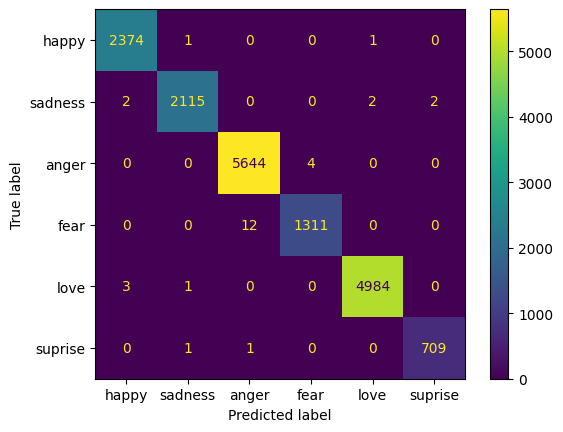

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

model = RandomForestClassifier(n_estimators=30)
#model = RandomForestClassifier(n_estimators=25)
#model = RandomForestClassifier(n_estimators=22)
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['happy', 'sadness', 'anger', 'fear', 'love', 'suprise'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

The bigger the value for the n_estmator was, the better the accuracy was. The smaller the numeber of the value, the lower the accuracy was. So I made to be 30 instead of 25 that it was set to be. 

In [120]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (4292, 17041)


numpy.ndarray

accuracy (on y_val): 0.8437


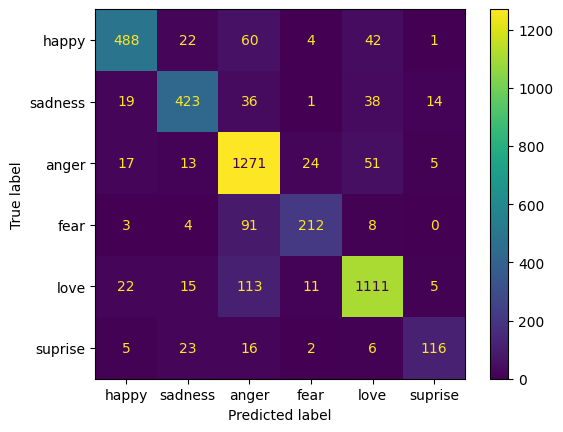

In [121]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['happy', 'sadness', 'anger', 'fear', 'love', 'suprise'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")

In [ ]:
from sklearn.metrics import log_loss

# A function to create and fit a RF with a specific number of trees
def tuneModel(hyperparam_value):
    rf_model = RandomForestClassifier(n_estimators=hyperparam_value, random_state=5)
    #rf_model = RandomForestClassifier(min_samples_split=hyperparam_value, random_state=1)
    rf_model.fit(X_train, y_train)
    y_train_pred_prob = rf_model.predict_proba(X_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred_prob = rf_model.predict_proba(X_val)
    y_val_pred = rf_model.predict(X_val)
    train_loss = log_loss(y_train, y_train_pred_prob, labels=['happy', 'sadness', 'anger', 'fear', 'love', 'suprise'])
    train_acc = accuracy_score(y_train, y_train_pred)
    val_loss = log_loss(y_val, y_val_pred_prob, labels=['happy', 'sadness', 'anger', 'fear', 'love', 'suprise'])
    val_acc = accuracy_score(y_val, y_val_pred)
    return (train_loss, val_loss, train_acc, val_acc)

# Possible values for the hyperparameter are in the range of 5 to 150 (by 50)
hyp_param_vals = list(range(10,261,50)) # good values for n_estimators
#hyp_param_vals = [2,3] + list(range(5, 50, 10)) # good values for min_samples_split
metrics = []


for hp in hyp_param_vals:
    metrics.append(tuneModel(hp))
    

In [ ]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.set_xticks(hyp_param_vals)
ax1.set(xlabel="n_neighbors", ylabel="loss (lower is better)")
ax1.plot(hyp_param_vals, [metric[1] for metric in metrics], '--ro') # validation loss
ax1.plot(hyp_param_vals, [metric[0] for metric in metrics], '--bo') # training loss
ax1.legend(["Validation Loss", "Train Loss"], loc=1)

ax2.set_xticks(hyp_param_vals)
ax2.set(xlabel="n_neighbors", ylabel="accuracy (higher is better)")
ax2.plot(hyp_param_vals, [metric[3] for metric in metrics], '--ro') # validation accuracy
ax2.plot(hyp_param_vals, [metric[2] for metric in metrics], '--bo') # training accuracy
ax2.legend(["Validation Accuracy", "Train Accuracy"], loc=1)

In [ ]:
tuning_results = np.array([hyp_param_vals, [round(metric[1],2) for metric in metrics], [round(metric[3],2) for metric in metrics]])
df_tuning_results = pd.DataFrame({'hyperparam':hyp_param_vals, 'test_loss':[metric[1] for metric in metrics], 'test_acc':[metric[3] for metric in metrics]})
print(df_tuning_results)

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
X2_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

# an alternative is to use term frequency:
#from sklearn.feature_extraction.text import CountVectorizer
#one_hot_vectorizer = CountVectorizer(binary=True)
#X_train = one_hot_vectorizer.fit_transform(X_train_raw))

print(f"X_train.shape = {X2_train.shape}")
type(X2_train)

X_train.shape = (17167, 17041)


numpy.ndarray

This part will be the tokenized and revised of the data where we took out the stop words and did lemmization. 

accuracy (on y_train): 0.9981


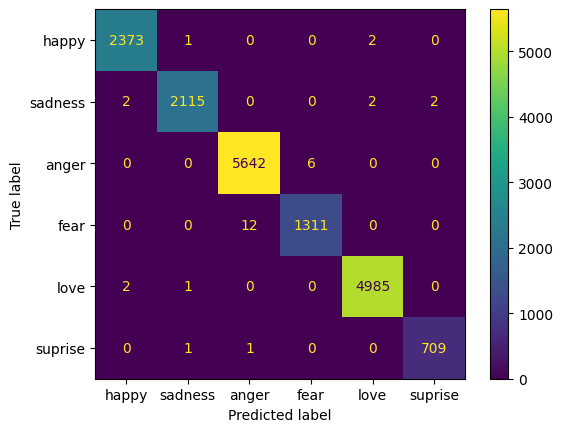

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

model = RandomForestClassifier(n_estimators=30)
#model = RandomForestClassifier(n_estimators=25)
#model = RandomForestClassifier(n_estimators=22)
model = model.fit(X2_train, y2_train)

predictions_train = model.predict(X2_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['happy', 'sadness', 'anger', 'fear', 'love', 'suprise'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

In [126]:
X2_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X2_val.shape}")
type(X2_val)

X_val.shape = (4292, 17041)


numpy.ndarray

accuracy (on y_val): 0.8425


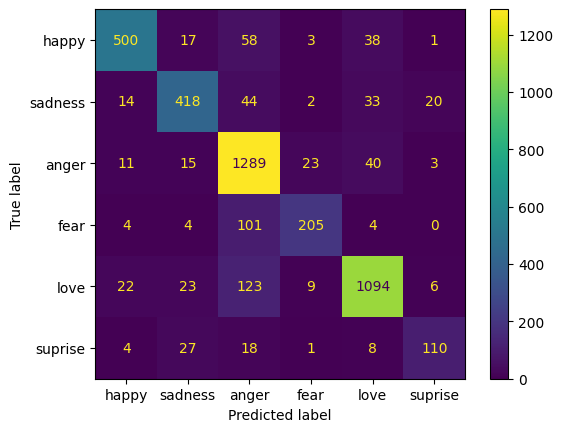

In [127]:
predictions_val = model.predict(X2_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y2_val, predictions_val), display_labels=['happy', 'sadness', 'anger', 'fear', 'love', 'suprise'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")

could see the accuracy is a little differnt from the regular text, but not that much off in accuarcy. 